In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,462,506,525,541,576,607,638,687,705,749


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 185 entries, Province/State to 7/20/20
dtypes: float64(2), int64(181), object(2)
memory usage: 384.6+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 185 entries, Province/State to 7/20/20
dtypes: float64(2), int64(181), object(2)
memory usage: 384.6+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,462,506,525,541,576,607,638,687,705,749


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


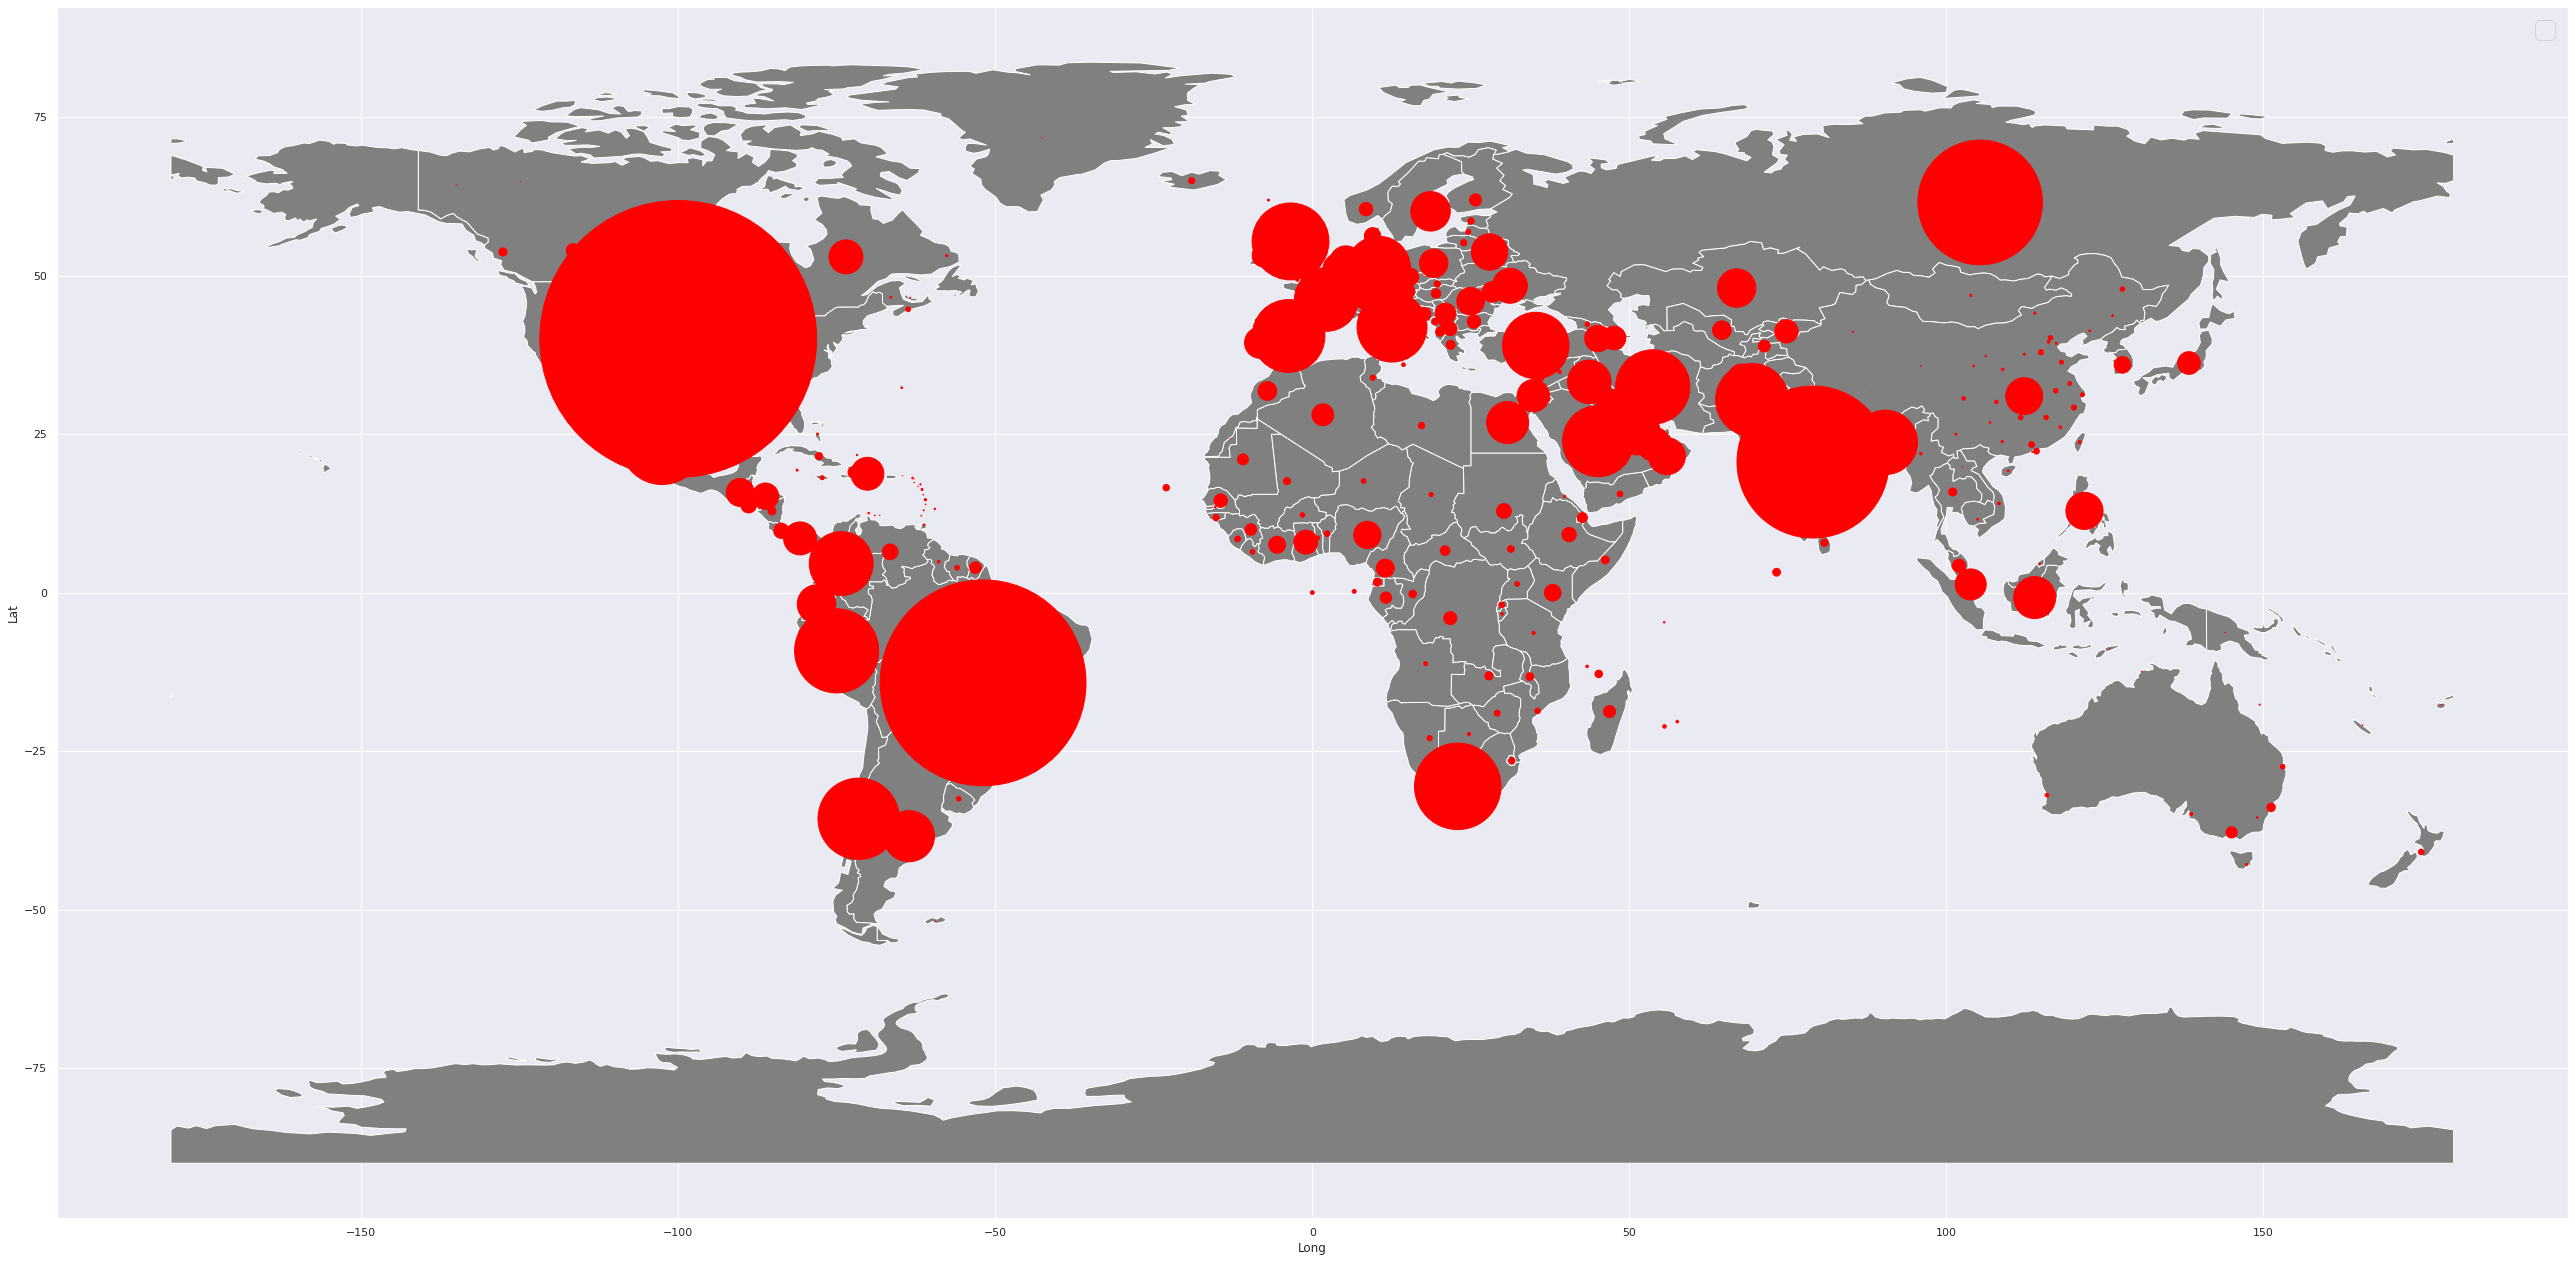

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/16/20,2673,1090645,196246,150376,186400,80018,1397531,12460,79161,916
7/17/20,2818,1107204,196483,150376,186900,80018,1428520,12519,79371,917
7/18/20,2902,1122720,196806,150376,187200,80018,1447408,12556,79371,921
7/19/20,2966,1131121,196949,150376,187400,80018,1459072,12572,79371,922


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/16/20,9546,50373,32939,3147,10957,30867,48743,765,133,2440
7/17/20,9969,51408,33809,3147,11207,31745,50113,768,136,2444
7/18/20,10551,52261,38042,3147,11508,32793,51519,774,137,2445
7/19/20,11114,53468,38677,3147,11846,33835,52855,790,137,2446


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/16/20,42,1000,1404,99,298,835,941,10,8,87
7/17/20,47,1038,1443,99,309,857,942,10,8,87
7/18/20,54,1071,1449,99,324,891,971,10,8,87
7/19/20,62,1096,1485,99,335,900,981,10,8,87


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/16/20,9546,50373,32939,3147,10957,30867,48743,765,133,2440
7/17/20,9969,51408,33809,3147,11207,31745,50113,768,136,2444
7/18/20,10551,52261,38042,3147,11508,32793,51519,774,137,2445
7/19/20,11114,53468,38677,3147,11846,33835,52855,790,137,2446


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/16/20,42,1000,1404,99,298,835,941,10,8,87
7/17/20,47,1038,1443,99,309,857,942,10,8,87
7/18/20,54,1071,1449,99,324,891,971,10,8,87
7/19/20,62,1096,1485,99,335,900,981,10,8,87


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
7/16/20,1.062319,1.022947,1.026969,1.0,1.029310,1.027667,1.022487,1.002621,1.000000,1.000820
7/17/20,1.044312,1.020547,1.026412,1.0,1.022816,1.028445,1.028107,1.003922,1.022556,1.001639
7/18/20,1.058381,1.016593,1.125203,1.0,1.026858,1.033013,1.028057,1.007812,1.007353,1.000409
7/19/20,1.053360,1.023096,1.016692,1.0,1.029371,1.031775,1.025932,1.020672,1.000000,1.000409


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,74,74,74,74,74,76,76,76,76,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,111,113,116,119,124,129,138,153,174,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,103,103,103,104,104,104,104,105,106,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1066,1066,1066,1067,1067,1067,1067,1067,1067,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,150445,154277,159898,165169,173206,182140,190700,197278,204005,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,7596,8036,8482,8986,9546,9969,10551,11114,11534,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2426,2428,2432,2438,2440,2444,2445,2446,2446,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,44532,45506,46305,47671,48743,50113,51519,52855,53956,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,9674,9978,10303,10645,10957,11207,11508,11846,12207,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,5949,6170,6229,6299,6393,6509,6655,6655,6745,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,74,74,74,74,74,76,76,76,76,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,111,113,116,119,124,129,138,153,174,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,103,103,103,104,104,104,104,105,106,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,7596,8036,8482,8986,9546,9969,10551,11114,11534,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2426,2428,2432,2438,2440,2444,2445,2446,2446,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,44532,45506,46305,47671,48743,50113,51519,52855,53956,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,9674,9978,10303,10645,10957,11207,11508,11846,12207,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,5949,6170,6229,6299,6393,6509,6655,6655,6745,POINT (-53.12580 3.93390)
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,43,43,43,43,43,46,46,46,46,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,29355,29742,30872,32074,32939,33809,38042,38677,39039,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'7/19/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,7/19/20,7/20/20
0,NaN,Panama,53468,54426
1,NaN,Dominican Republic,52855,53956
2,NaN,Guatemala,38677,39039
3,NaN,Honduras,33835,34611
4,NaN,El Salvador,11846,12207
5,NaN,Costa Rica,11114,11534
6,NaN,Haiti,7053,7053
7,French Guiana,France,6655,6745
8,NaN,Nicaragua,3147,3147
9,NaN,Cuba,2446,2446


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,5119,5307,5455,5625,5814,6029,6288,6516,6736,6929
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,28,30,34,37,40,42,47,54,62,66
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,880,897,903,910,929,941,942,971,981,993
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,254,260,267,278,286,298,309,324,335,344
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,26,26,29,31,33,34,34,37,37,38


In [49]:
temp_deaths.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,28,30,34,37,40,42,47,54,62,66
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,880,897,903,910,929,941,942,971,981,993
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,254,260,267,278,286,298,309,324,335,344
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,26,26,29,31,33,34,34,37,37,38
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,1172,1219,1244,1302,1350,1404,1443,1449,1485,1502


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'7/19/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,7/19/20,7/20/20
0,NaN,Guatemala,1485,1502
1,NaN,Panama,1096,1127
2,NaN,Dominican Republic,981,993
3,NaN,Honduras,900,935
4,NaN,El Salvador,335,344
5,NaN,Haiti,146,146
6,NaN,Nicaragua,99,99
7,NaN,Cuba,87,87
8,NaN,Costa Rica,62,66
9,French Guiana,France,37,38


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,57,57,57,57,57,57,57,57,57,57
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,89,89,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,90,90,90,90,90,90,91,91,91,91
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,20,20,20,21,21,22,22,22,22,22
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,58800,61186,63451,65809,68806,71736,80637,85836,91793,95804
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2220,2239,2304,2441,2551,2673,2818,2902,2966,3019
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2254,2258,2268,2275,2277,2285,2300,2304,2308,2308
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,20996,21459,22441,23134,23459,23636,24423,24607,25094,25561
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,5516,5634,5732,5919,6120,6257,6422,6560,6705,6831


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,57,57,57,57,57,57,57,57,57,57
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,89,89,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,90,90,90,90,90,90,91,91,91,91
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2220,2239,2304,2441,2551,2673,2818,2902,2966,3019
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2254,2258,2268,2275,2277,2285,2300,2304,2308,2308
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,20996,21459,22441,23134,23459,23636,24423,24607,25094,25561
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,5516,5634,5732,5919,6120,6257,6422,6560,6705,6831
99,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,2981,2981,3210,3472,3738,3818,3932,4272,4272,4714
107,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,37,37,37,37,37,37,39,39,39,39
116,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,4073,4214,4321,4453,4624,4807,4989,23365,23365,25539


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'7/19/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,7/19/20,7/20/20
0,NaN,Panama,28482,29164
1,NaN,Dominican Republic,25094,25561
2,NaN,Guatemala,23365,25539
3,NaN,El Salvador,6705,6831
4,French Guiana,France,4272,4714
5,NaN,Honduras,3801,3905
6,NaN,Haiti,3877,3877
7,NaN,Costa Rica,2966,3019
8,NaN,Cuba,2308,2308
9,NaN,Nicaragua,2282,2282


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,74,74,74,74,74,74,76,76,76,76
1,Bahamas,0,0,0,0,0,0,0,0,0,...,111,111,113,116,119,124,129,138,153,174
2,Barbados,0,0,0,0,0,0,0,0,0,...,103,103,103,103,104,104,104,104,105,106
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,7231,7596,8036,8482,8986,9546,9969,10551,11114,11534
4,Cuba,0,0,0,0,0,0,0,0,0,...,2420,2426,2428,2432,2438,2440,2444,2445,2446,2446
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,43114,44532,45506,46305,47671,48743,50113,51519,52855,53956
6,El Salvador,0,0,0,0,0,0,0,0,0,...,9391,9674,9978,10303,10645,10957,11207,11508,11846,12207
7,French Guiana,0,0,0,0,0,0,0,0,0,...,5949,5949,6170,6229,6299,6393,6509,6655,6655,6745
8,St Martin,0,0,0,0,0,0,0,0,0,...,43,43,43,43,43,43,46,46,46,46
9,Guatemala,0,0,0,0,0,0,0,0,0,...,28598,29355,29742,30872,32074,32939,33809,38042,38677,39039


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,28,30,34,37,40,42,47,54,62,66
4,Cuba,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,880,897,903,910,929,941,942,971,981,993
6,El Salvador,0,0,0,0,0,0,0,0,0,...,254,260,267,278,286,298,309,324,335,344
7,French Guiana,0,0,0,0,0,0,0,0,0,...,26,26,29,31,33,34,34,37,37,38
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1172,1219,1244,1302,1350,1404,1443,1449,1485,1502


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,57,57,57,57,57,57,57,57,57,57
1,Bahamas,0,0,0,0,0,0,0,0,0,...,89,89,91,91,91,91,91,91,91,91
2,Barbados,0,0,0,0,0,0,0,0,0,...,90,90,90,90,90,90,91,91,91,91
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2220,2239,2304,2441,2551,2673,2818,2902,2966,3019
4,Cuba,0,0,0,0,0,0,0,0,0,...,2254,2258,2268,2275,2277,2285,2300,2304,2308,2308
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,20996,21459,22441,23134,23459,23636,24423,24607,25094,25561
6,El Salvador,0,0,0,0,0,0,0,0,0,...,5516,5634,5732,5919,6120,6257,6422,6560,6705,6831
7,French Guiana,0,0,0,0,0,0,0,0,0,...,2981,2981,3210,3472,3738,3818,3932,4272,4272,4714
8,St Martin,0,0,0,0,0,0,0,0,0,...,37,37,37,37,37,37,39,39,39,39
9,Guatemala,0,0,0,0,0,0,0,0,0,...,4073,4214,4321,4453,4624,4807,4989,23365,23365,25539


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(143, 22)

In [75]:
recovered_camcar_all.shape

(143, 22)

In [76]:
deaths_camcar_all.shape

(143, 22)

In [77]:
active_camcar_all.shape

(143, 22)